# Detailed ARIMA Model Prediction for Ripple Close Prices
This notebook implements a detailed ARIMA model for predicting Ripple's closing prices. 
The process includes loading data, cleaning, visualization, checking for stationarity, fitting the model, and plotting predictions.


C:\Users\onat.postaci\AppData\Local\Temp\ipykernel_20820\2321029704.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, names=column_names, parse_dates=['Open time'], index_col='Open time')


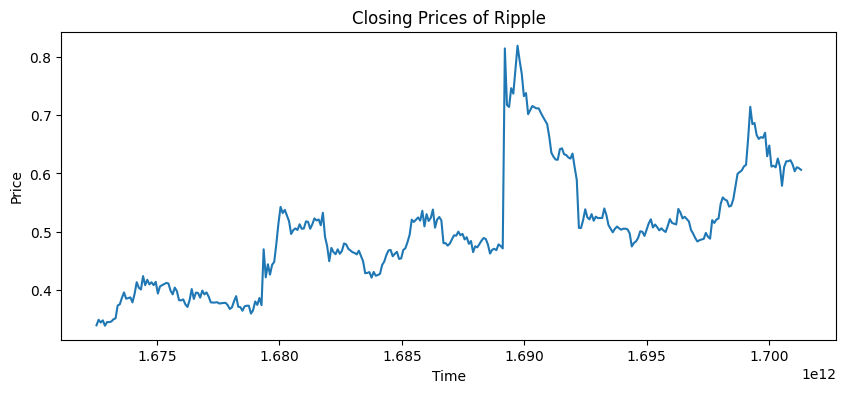

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load and clean the data
file_path = './Merged_CSV.csv'
column_names = ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 
                'Close time', 'Quote asset volume', 'Number of trades', 
                'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
df = pd.read_csv(file_path, names=column_names, parse_dates=['Open time'], index_col='Open time')
df_clean = df.dropna()

# Plot the closing prices
plt.figure(figsize=(10,4))
plt.plot(df_clean['Close'])
plt.title('Closing Prices of Ripple')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [2]:
# Perform Augmented Dickey-Fuller test to check stationarity
result = adfuller(df_clean['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# If p-value > 0.05, we conclude that the time series is not stationary
if result[1] > 0.05:
    print("Time series is not stationary.")
else:
    print("Time series is stationary.")



ADF Statistic: -2.054299
p-value: 0.263284
Time series is not stationary.


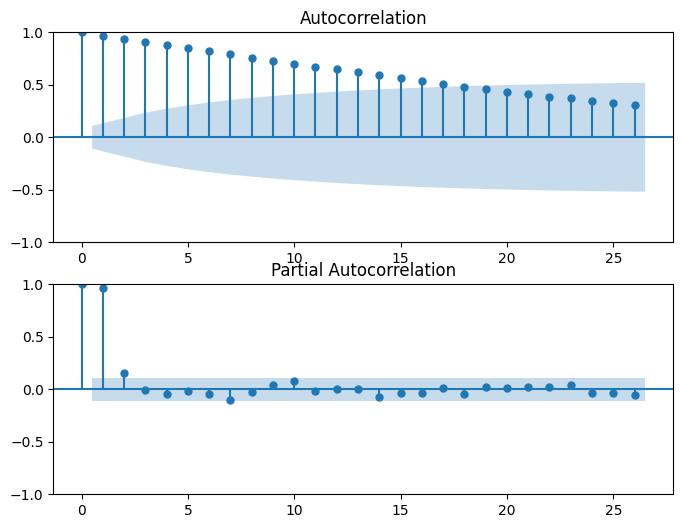

In [3]:
# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))
plot_acf(df_clean['Close'].dropna(), ax=ax1)
plot_pacf(df_clean['Close'].dropna(), ax=ax2)
plt.show()


In [4]:
# Fit ARIMA model
# Using 1,1,1 as example parameters
model = ARIMA(df_clean['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  324
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 737.223
Date:                Sun, 21 Jan 2024   AIC                          -1468.446
Time:                        17:39:24   BIC                          -1457.113
Sample:                             0   HQIC                         -1463.922
                                - 324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1477      0.355     -0.416      0.677      -0.843       0.548
ma.L1         -0.0548      0.354     -0.155      0.877      -0.749       0.640
sigma2         0.0006   6.33e-06     96.304      0.0

c:\Users\onat.postaci\AppData\Local\anaconda3\envs\onat_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\onat.postaci\AppData\Local\anaconda3\envs\onat_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\onat.postaci\AppData\Local\anaconda3\envs\onat_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


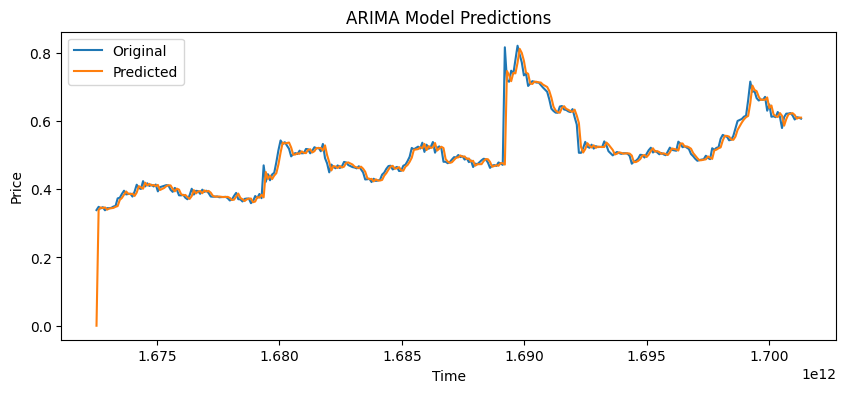

In [5]:
# Plot the predictions
plt.figure(figsize=(10,4))
plt.plot(df_clean['Close'].dropna(), label='Original')
plt.plot(model_fit.predict(), label='Predicted')
plt.title('ARIMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
